In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [35]:
# define a piecewise function
def f(x, a, b, c):
    # a: first breakpoint
    # b: second breakpoint
    # c: slope of the middle line
    y = np.zeros_like(x)
    y[x < a] = 0
    y[np.logical_and(x >= a, x < b)] = c * (x[np.logical_and(x >= a, x < b)] - a)
    y[x >= b] = c * (b - a)
    return y

def loss(x, y, a, b, c, power=2):
    return np.sum(np.abs((y - f(x, a, b, c)))**power)

loss: 2789.44440748784
Inital guess - first breakpoint: 1, second breakpoint: 2, slope of the middle line: 3
Fitted params - first breakpoint: 1.19, second breakpoint: 6.06, slope of the middle line: 3.90


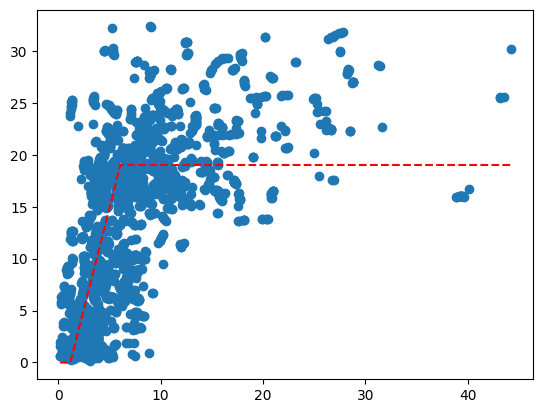

In [73]:
# import csv data
df = pd.read_csv('data.csv').sort_values(by=['gap'])
df = df.set_index('gap')

x = df.index.values
y = df['speed'].values

# set the bounds
bounds = [[0, np.inf], [0, np.inf], [0, np.inf]]

# fit the data
initial_guess = [1,2,3]
res = scipy.optimize.minimize(lambda params: loss(x,y, *params, power=0.1), x0=initial_guess, bounds=bounds)

# print the result
params_descriptions = ['first breakpoint', 'second breakpoint', 'slope of the middle line']
print(f'loss: {res.fun}')
print('Inital guess - ' + ', '.join([f'{param}: {value}' for param, value in zip(params_descriptions, initial_guess)]))
print('Fitted params - ' + ', '.join([f'{param}: {value:.2f}' for param, value in zip(params_descriptions, res.x)]))

# draw the plot
plt.plot(x, y, 'o', label='data')
plt.plot(x, f(x, *res.x), 'r--', label='fit')
plt.show()
